In [3]:
import sys
import os
from importlib import reload
import pylab as plt
import skimage
import numpy as np
from skimage import exposure

sys.path.insert(0, '../../src')
import deepleeo.dataset.image_utils as iutils
import deepleeo.utils.geofunctions as gf
import deepleeo.utils.visualization as vis

reload(iutils)
reload(gf)
reload(vis)

<module 'deepleeo.utils.visualization' from '../../src/deepleeo/utils/visualization.py'>

In [4]:
DATA_DIR = "/home/raian/doutorado/Dados/generated"

band_names_13_14 = ["Green_2013", "Red_2013", "NIR_2013", "SWIR_1_2013", "SWIR_2_2013",
                    "Green_2014", "Red_2014", "NIR_2014", "SWIR_1_2014", "SWIR_2_2014"]
band_names_14_15 = ["Green_2014", "Red_2014", "NIR_2014", "SWIR_1_2014", "SWIR_2_2014",
                    "Green_2015", "Red_2015", "NIR_2015", "SWIR_1_2015", "SWIR_2_2015"]
band_names_15_16 = ["Green_2015", "Red_2015", "NIR_2015", "SWIR_1_2015", "SWIR_2_2015",
                    "Green_2016", "Red_2016", "NIR_2016", "SWIR_1_2016", "SWIR_2_2016"]

shp_ref = os.path.join(DATA_DIR, "Prodes_mosaic.shp")
# OUTPUT_DIR = os.path.join(DATA_DIR, "generated")

In [5]:
input_files_13_14 = [os.path.join(DATA_DIR, "mosaic_2013.tif"),
                     os.path.join(DATA_DIR, "mosaic_2014.tif")]
input_files_14_15 = [os.path.join(DATA_DIR, "mosaic_2014.tif"),
                     os.path.join(DATA_DIR, "mosaic_2015.tif")]
input_files_15_16 = [os.path.join(DATA_DIR, "mosaic_2015.tif"),
                     os.path.join(DATA_DIR, "mosaic_2016.tif")]
out_img_13_14 = os.path.join(DATA_DIR, "stacked_mosaic_2013_2014.tif")
out_img_14_15 = os.path.join(DATA_DIR, "stacked_mosaic_2014_2015.tif")
out_img_15_16 = os.path.join(DATA_DIR, "stacked_mosaic_2015_2016.tif")

In [6]:
iutils.stack_temporal_images(input_files_13_14, out_img_13_14, band_names_13_14)

In [7]:
iutils.stack_temporal_images(input_files_14_15, out_img_14_15, band_names_14_15)

In [8]:
iutils.stack_temporal_images(input_files_15_16, out_img_15_16, band_names_15_16)

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


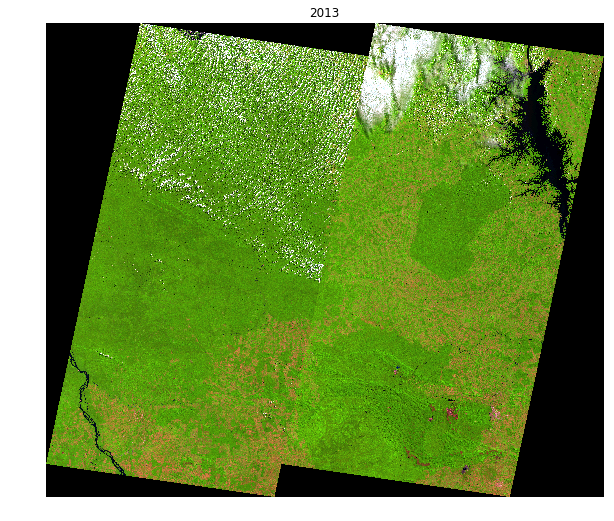

In [9]:
raster_img = gf.load_image(out_img_13_14, no_data=-9999)
vis.plot_rgb_img(raster_img, bands=[3,2,1], contrast=True, title="2013")

In [10]:
import gdal
ds = gdal.Open(out_img_13_14)
for band in range(1, ds.RasterCount + 1):
    print("BAND NAME: ", ds.GetRasterBand(band).GetDescription())
    print("BAND NoDataValue: ", ds.GetRasterBand(band).GetNoDataValue())
    print("BAND Metadata: ", ds.GetRasterBand(band).GetMetadata())
ds = None

BAND NAME:  Green_2013
BAND NoDataValue:  -9999.0
BAND Metadata:  {}
BAND NAME:  Red_2013
BAND NoDataValue:  -9999.0
BAND Metadata:  {}
BAND NAME:  NIR_2013
BAND NoDataValue:  -9999.0
BAND Metadata:  {}
BAND NAME:  SWIR_1_2013
BAND NoDataValue:  -9999.0
BAND Metadata:  {}
BAND NAME:  SWIR_2_2013
BAND NoDataValue:  -9999.0
BAND Metadata:  {}
BAND NAME:  Green_2014
BAND NoDataValue:  -9999.0
BAND Metadata:  {}
BAND NAME:  Red_2014
BAND NoDataValue:  -9999.0
BAND Metadata:  {}
BAND NAME:  NIR_2014
BAND NoDataValue:  -9999.0
BAND Metadata:  {}
BAND NAME:  SWIR_1_2014
BAND NoDataValue:  -9999.0
BAND Metadata:  {}
BAND NAME:  SWIR_2_2014
BAND NoDataValue:  -9999.0
BAND Metadata:  {}


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


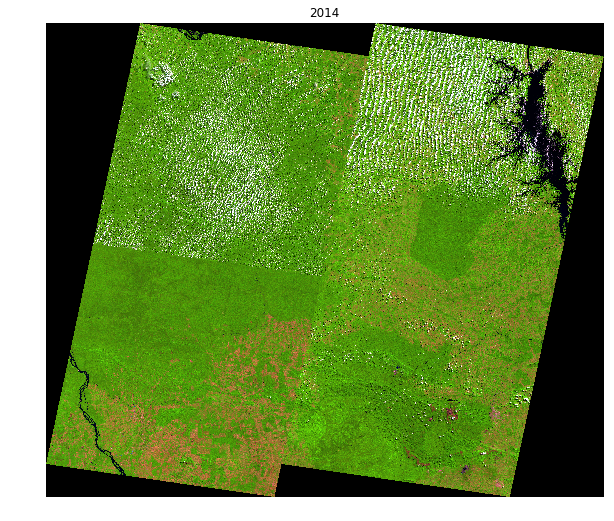

In [11]:
vis.plot_rgb_img(raster_img, bands=[8,7,6], contrast=True, title="2014")